# Importing Necessary Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Path to Dataset Directory

In [28]:
dataset_dir = 'asl_dataset/'

# Data Generator

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    validation_split=0.2 
)

# Training Data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation Data
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


# Define Model

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

c:\Users\Aditya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model

In [32]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


c:\Users\Aditya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.2944 - loss: 2.7422 - val_accuracy: 0.7575 - val_loss: 0.7508
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.8229 - loss: 0.5791 - val_accuracy: 0.8052 - val_loss: 0.5887
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8945 - loss: 0.3485 - val_accuracy: 0.8171 - val_loss: 0.5217
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9326 - loss: 0.2009 - val_accuracy: 0.8131 - val_loss: 0.5545
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9463 - loss: 0.1684 - val_accuracy: 0.8250 - val_loss: 0.5007
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9530 - loss: 0.1334 - val_accuracy: 0.8489 - val_loss: 0.4783
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9720 - loss: 0.0936 - val_accuracy: 0.8429 - val_loss: 0.4864
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9590 - loss: 0.1166 - val_accuracy: 0.8231 - val

# Save Model

In [33]:
model_path = 'sign_language_model.keras'
model.save(model_path)
print(f"Model training complete and saved as '{model_path}'")

Model training complete and saved as 'sign_language_model.keras'


# Load the model

In [34]:
model_path = 'sign_language_model.keras'
model = tf.keras.models.load_model(model_path)

# Model summary

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889,390 (18.65 MB)

 Trainable params: 1,629,796 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,259,594 (12.43 MB)

# Evaluate Model

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        14
           2       0.05      0.07      0.06        14
           3       0.00      0.00      0.00        14
           4       0.07      0.07      0.07        14
           5       0.06      0.07      0.07        14
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        14
           a       0.00      0.00      0.00        14
           b       0.13      0.14      0.14        14
           c       0.00      0.00      0.00        14
           d       0.00      0.00      0.00        14
           e       0.00      0.00      0.00        14
           f       0.00      0.00      0.00        14
           g     

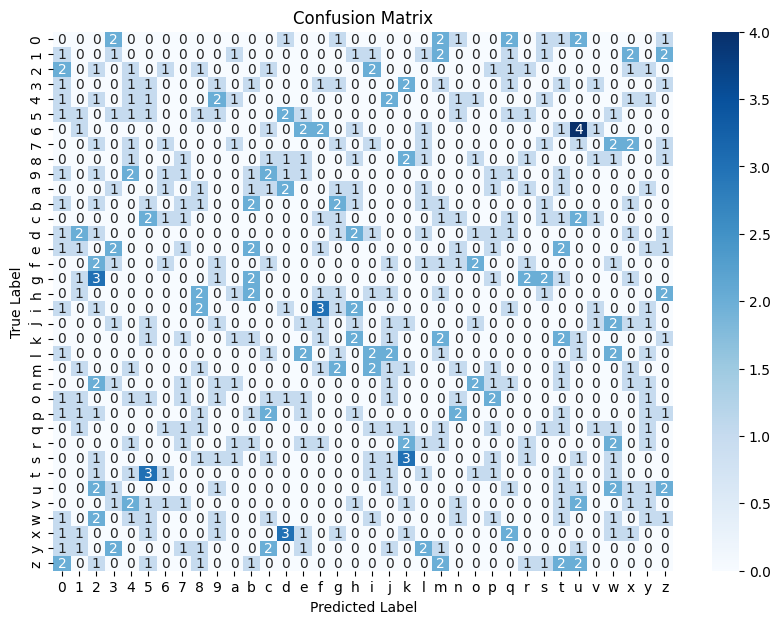

In [40]:
# Predict on validation data
validation_generator.reset()
steps = np.ceil(validation_generator.samples / validation_generator.batch_size).astype(int)
predictions = model.predict(validation_generator, steps=steps)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classe

# Classification Report

In [41]:
class_names = list(validation_generator.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        14
           2       0.05      0.07      0.06        14
           3       0.00      0.00      0.00        14
           4       0.07      0.07      0.07        14
           5       0.06      0.07      0.07        14
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        14
           a       0.00      0.00      0.00        14
           b       0.13      0.14      0.14        14
           c       0.00      0.00      0.00        14
           d       0.00      0.00      0.00        14
           e       0.00      0.00      0.00        14
           f       0.00      0.00      0.00        14
           g       0.00      0.00      0.00        14
   

# Confusion Matrix

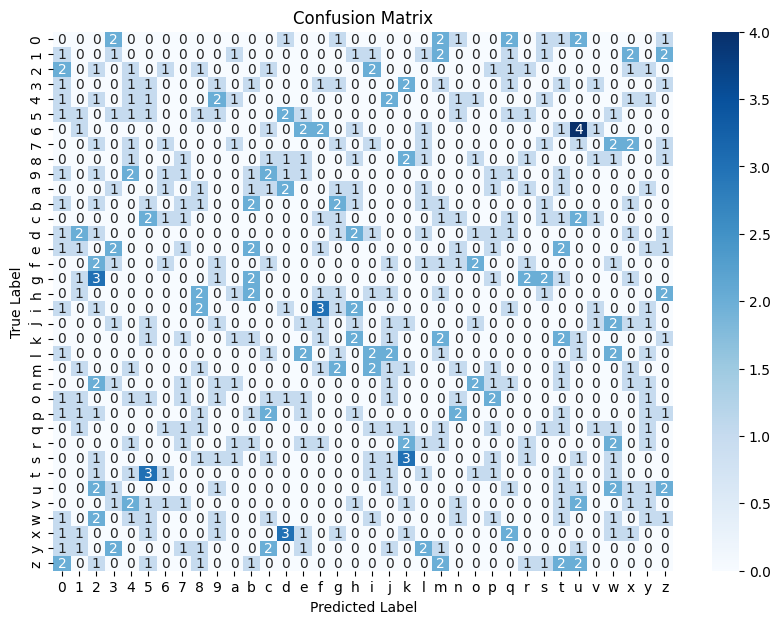

In [42]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting training & validation accuracy and loss

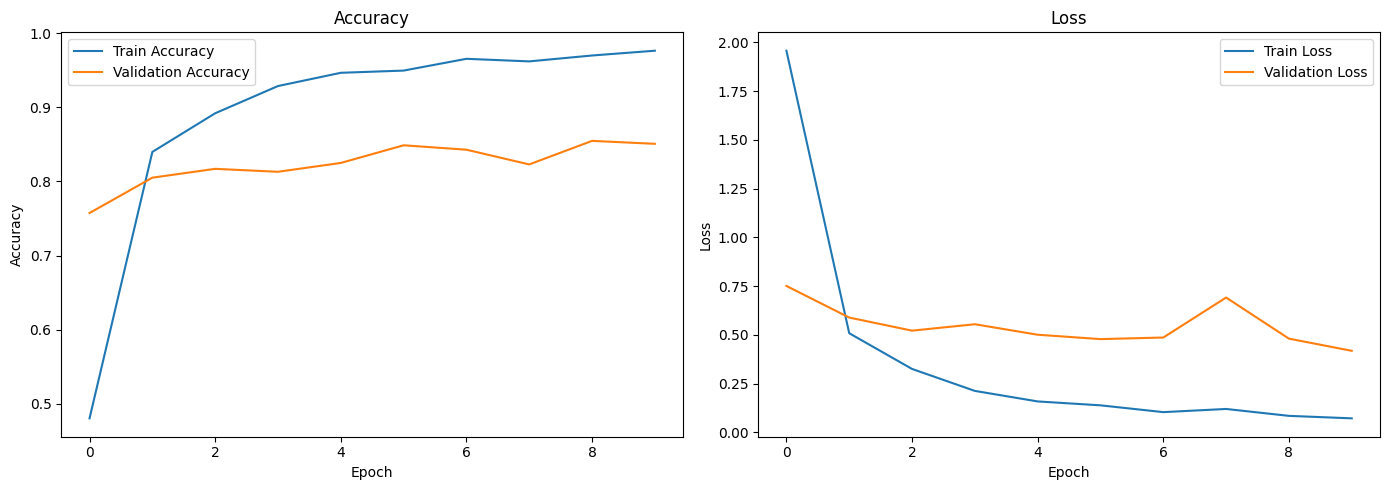

In [45]:
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()